In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind


#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Data Visualization

link to tableau

In [98]:
marvel_comics = pd.read_csv('marvel_comics.csv')

In [99]:
marvel_comics.head()

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free


In [100]:
marvel_comics.shape

(34992, 12)

In [101]:
marvel_comics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34992 non-null  object
 1   active_years       34992 non-null  object
 2   issue_title        34466 non-null  object
 3   publish_date       34466 non-null  object
 4   issue_description  30395 non-null  object
 5   penciler           25482 non-null  object
 6   writer             27595 non-null  object
 7   cover_artist       12255 non-null  object
 8   Imprint            11684 non-null  object
 9   Format             32894 non-null  object
 10  Rating             12619 non-null  object
 11  Price              32894 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB


In [102]:
marvel_comics.nunique()

comic_name            4935
active_years           412
issue_title          33757
publish_date          3317
issue_description    29331
penciler              3915
writer                3082
cover_artist          1010
Imprint                 39
Format                  11
Rating                  36
Price                   53
dtype: int64

# Summary Stats

## Exploratory Data Analysis

In [103]:
# read in marvel_movies.csv
marvel_movies = pd.read_csv('marvel_movies.csv')
marvel_movies.head()

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...


In [104]:
marvel_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   film                            30 non-null     object 
 1   category                        30 non-null     object 
 2   worldwide gross ($m)            30 non-null     int64  
 3   % budget recovered              30 non-null     object 
 4   critics % score                 30 non-null     object 
 5   audience % score                30 non-null     object 
 6   audience vs critics % deviance  30 non-null     object 
 7   budget                          30 non-null     float64
 8   domestic gross ($m)             30 non-null     int64  
 9   international gross ($m)        30 non-null     int64  
 10  opening weekend ($m)            30 non-null     float64
 11  second weekend ($m)             30 non-null     float64
 12  1st vs 2nd weekend drop off     30 non

In [105]:
# all the % columns are listed as objects. need to convert to int 
columns_to_convert = [
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    '1st vs 2nd weekend drop off',
    '% gross from domestic',
    '% gross from international',
    '% budget opening weekend'
]

for column in columns_to_convert:
    marvel_movies[column] = marvel_movies[column].apply(lambda x: int(float(str(x).replace('%', '').replace(',', ''))) if pd.notna(x) else None)

In [106]:
print(f'Rows: {marvel_movies.shape[0]}')
print(f'Columns: {marvel_movies.shape[1]}')

Rows: 30
Columns: 19


In [107]:
marvel_movies.describe()

,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,940.866667,457.033333,82.566667,82.233333,0.333333,199.283333,370.900000,569.433333,136.770000,57.390000,-57.766667,38.070000,40.766667,58.300000,66.033333,2016.266667
std,563.119068,181.228087,11.263868,11.031876,9.437027,63.656362,193.394603,387.182634,71.790822,30.440154,6.072455,5.439457,7.271500,7.358551,21.840303,4.176563
min,265.000000,190.000000,47.000000,45.000000,-26.000000,130.000000,134.000000,130.000000,55.000000,22.100000,-68.000000,23.700000,30.000000,45.000000,35.000000,2008.000000
25%,594.000000,321.750000,77.500000,76.250000,-2.750000,161.250000,218.000000,315.500000,81.475000,35.150000,-62.000000,35.000000,34.000000,52.500000,51.250000,2013.250000
50%,810.000000,432.000000,85.000000,85.500000,0.000000,183.000000,333.500000,448.500000,119.500000,48.900000,-58.000000,37.800000,40.000000,59.000000,58.000000,2017.000000
75%,1146.250000,581.500000,91.000000,91.000000,3.000000,200.000000,422.250000,731.250000,180.500000,71.350000,-54.250000,41.925000,46.750000,65.000000,82.500000,2019.000000
max,2797.000000,956.000000,96.000000,96.000000,34.000000,400.000000,858.000000,1939.000000,357.000000,147.000000,-45.000000,48.600000,54.000000,69.000000,130.000000,2022.000000


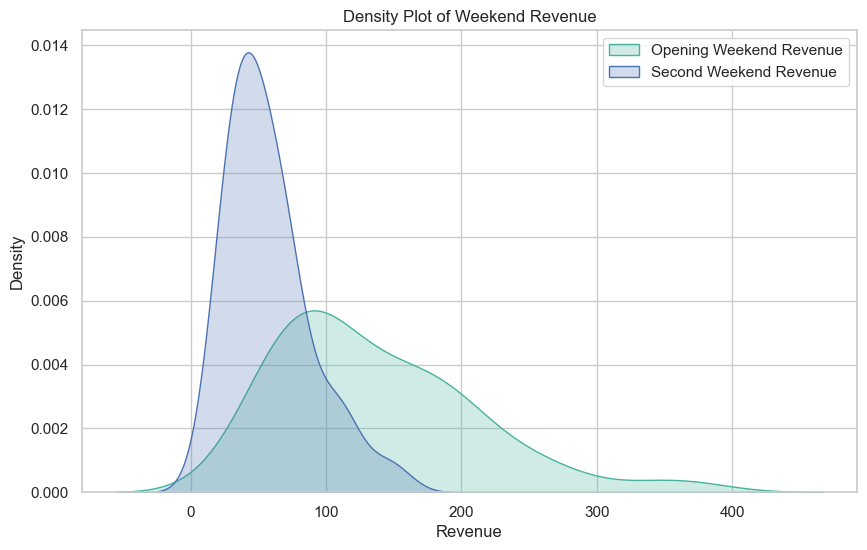

In [108]:
# weekend revenue
plt.figure(figsize=(10, 6))

# Plot the density for opening weekend revenue
sns.kdeplot(marvel_movies['opening weekend ($m)'], fill=True, label='Opening Weekend Revenue', color = '#45b39d')

# Overlay the density for second weekend revenue
sns.kdeplot(marvel_movies['second weekend ($m)'], fill=True, label='Second Weekend Revenue')

plt.title('Density Plot of Weekend Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

In [109]:
# create a new column containing the exact release date found on Google
release_dates = pd.to_datetime([
    '2015-07-17', '2018-07-06', '2015-05-01', '2019-04-26', '2018-04-27', '2018-02-16',
    '2022-11-11', '2021-07-09', '2011-07-22', '2016-05-06', '2014-04-04', '2019-03-08',
    '2016-11-04', '2022-05-06', '2021-11-05', '2014-08-01', '2017-05-05', '2008-06-13',
    '2008-05-02', '2010-05-07', '2013-05-03', '2021-09-03', '2019-07-02', '2017-07-07',
    '2021-12-17', '2012-05-04', '2013-11-08', '2022-07-08', '2017-11-03', '2011-05-06'
])

# Append the 'Release Date' column to the 'marvel_movies' DataFrame
marvel_movies['release date'] = release_dates

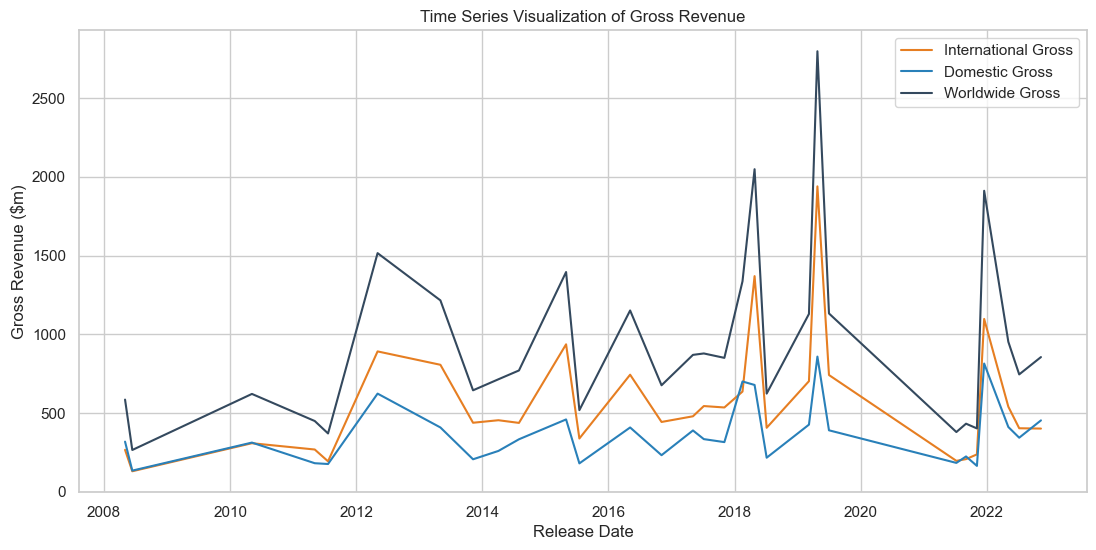

In [110]:
marvel_movies_sorted_date = marvel_movies.set_index('release date')
marvel_movies_sorted_date.sort_index(inplace=True)

# Plotting the time series for gross revenue
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(marvel_movies_sorted_date['international gross ($m)'], color='#e67e22', label='International Gross')
ax.plot(marvel_movies_sorted_date['domestic gross ($m)'], color='#2980b9', label='Domestic Gross')
ax.plot(marvel_movies_sorted_date['worldwide gross ($m)'], color='#34495e', label='Worldwide Gross')

# Adding labels and title
plt.xlabel('Release Date')
plt.ylabel('Gross Revenue ($m)')
plt.title('Time Series Visualization of Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
print(marvel_movies['category'].value_counts())

category
Unique             5
Avengers           4
Thor               4
Captain America    3
Iron Man           3
Spider-Man         3
Ant-Man            2
Black Panther      2
Dr Strange         2
Guardians          2
Name: count, dtype: int64


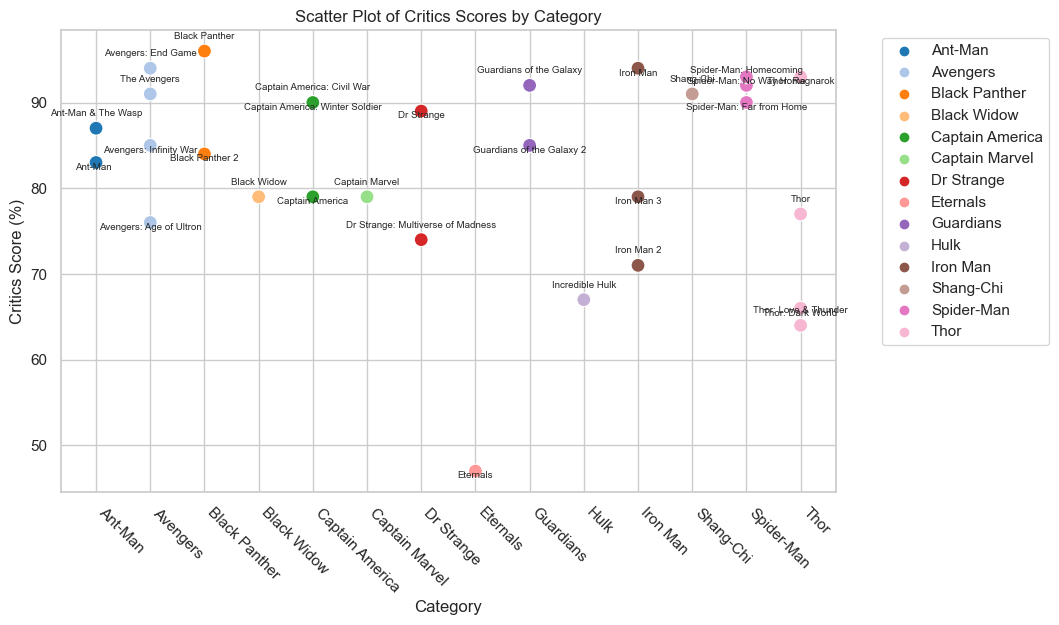

In [112]:
# fill in unique categories
marvel_movies_altcat = marvel_movies.copy()
marvel_movies_altcat.iloc[7, 1] = 'Black Widow'
marvel_movies_altcat.iloc[11, 1] = 'Captain Marvel'
marvel_movies_altcat.iloc[14, 1] = 'Eternals'
marvel_movies_altcat.iloc[17, 1] = 'Hulk'
marvel_movies_altcat.iloc[21, 1] = 'Shang-Chi'

# critics % score by category
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='category', y='critics % score', data=marvel_movies_altcat, hue='category', palette='tab20', s=100)

for i, txt in enumerate(marvel_movies_altcat['film']):
    va = 'top' if i % 2 == 0 else 'bottom'
    plt.annotate(txt + '\n', (marvel_movies_altcat['category'][i], marvel_movies_altcat['critics % score'][i]),
                 ha='center', va=va, fontsize=7, multialignment='center')


plt.xlabel('Category')
plt.ylabel('Critics Score (%)')
plt.title('Scatter Plot of Critics Scores by Category')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=-45, ha='left', ticks=range(len(marvel_movies_altcat['category'].unique())), 
           labels=marvel_movies_altcat['category'].unique())

# Show the plot
plt.show()

# Segmentation and Targeting

## Data Cleaning

In [113]:
# read in regional_families.csv dataset
regional_families = pd.read_csv('regional_families.csv')

In [114]:
regional_families

,householdID,dietary_spec,dist_park,email_sub,est_inc,hhold_size,leisure_perc,oldest,passholder,previous_attend,social_media_scale,youngest
0,1,NaN,0.9,No,62641.584126,2,0.08,92,1,1,0.70,13
1,2,NaN,23.8,Yes,70127.969071,3,0.21,41,1,4,0.29,24
2,3,NaN,27.3,No,112130.429602,1,0.11,67,1,1,0.08,67
3,4,NaN,20.7,No,76096.440915,2,0.04,31,1,1,0.99,1
4,5,Gluten-Free,55.1,Yes,79925.089485,6,0.27,52,0,0,0.22,25
...,...,...,...,...,...,...,...,...,...,...,...,...
8495,8496,NaN,53.1,Yes,86726.147236,3,0.17,35,1,3,0.17,6
8496,8497,NaN,30.9,No,49649.855395,2,0.05,82,1,2,0.80,49
8497,8498,NaN,52.8,No,114908.843386,1,0.12,77,0,2,0.61,77
8498,8499,NaN,8.6,Yes,97334.292891,3,0.19,63,1,1,0.15,12


In [115]:
regional_families.drop('householdID', axis=1, inplace=True)

In [116]:
regional_families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dietary_spec        1768 non-null   object 
 1   dist_park           8500 non-null   float64
 2   email_sub           8500 non-null   object 
 3   est_inc             8500 non-null   float64
 4   hhold_size          8500 non-null   int64  
 5   leisure_perc        8500 non-null   float64
 6   oldest              8500 non-null   int64  
 7   passholder          8500 non-null   int64  
 8   previous_attend     8500 non-null   int64  
 9   social_media_scale  8500 non-null   float64
 10  youngest            8500 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 730.6+ KB


In [117]:
# change email_sub to binary variable
regional_families['email_sub'] = regional_families['email_sub'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

## Variable Selection

In [118]:
regional_families.head()

,dietary_spec,dist_park,email_sub,est_inc,hhold_size,leisure_perc,oldest,passholder,previous_attend,social_media_scale,youngest
0,NaN,0.9,0,62641.584126,2,0.08,92,1,1,0.70,13
1,NaN,23.8,1,70127.969071,3,0.21,41,1,4,0.29,24
2,NaN,27.3,0,112130.429602,1,0.11,67,1,1,0.08,67
3,NaN,20.7,0,76096.440915,2,0.04,31,1,1,0.99,1
4,Gluten-Free,55.1,1,79925.089485,6,0.27,52,0,0,0.22,25


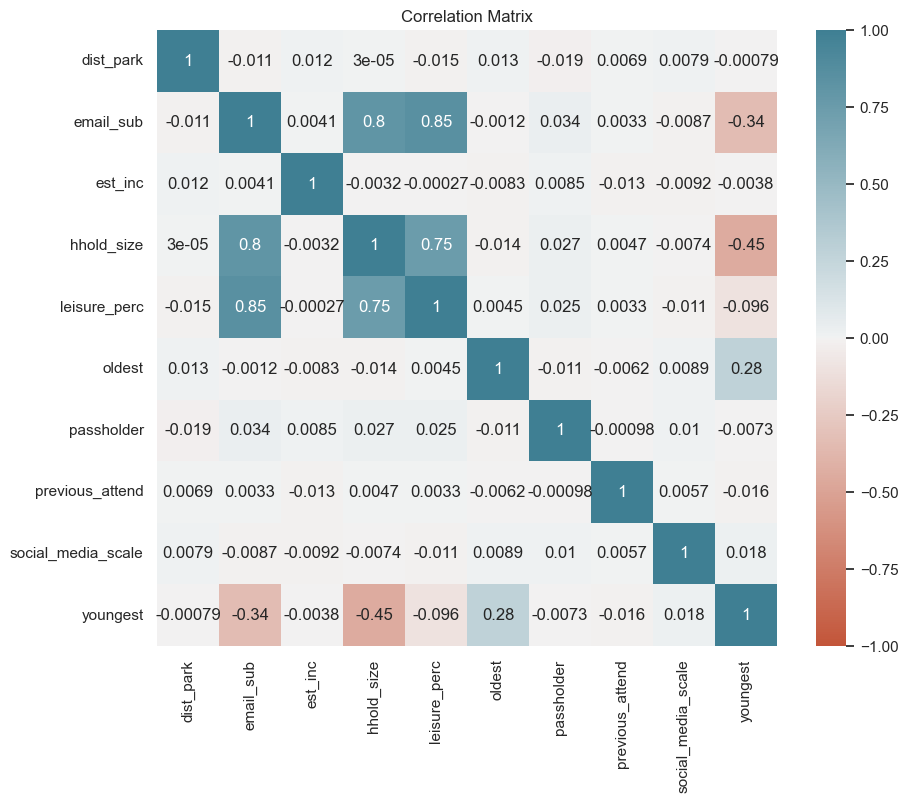

In [119]:
# check for highly correlated variables to avoid redundancy
correlation_matrix = regional_families.corr(numeric_only=True)

# Custom colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

- to avoid redundancy and reduce dimensionality, take a subset of our dataset

In [120]:
columns = ['dist_park', 'email_sub', 'est_inc', 'previous_attend', 'social_media_scale', 'youngest']
regional_fam_num = regional_families[columns]

In [121]:
regional_fam_num.head()

,dist_park,email_sub,est_inc,previous_attend,social_media_scale,youngest
0,0.9,0,62641.584126,1,0.70,13
1,23.8,1,70127.969071,4,0.29,24
2,27.3,0,112130.429602,1,0.08,67
3,20.7,0,76096.440915,1,0.99,1
4,55.1,1,79925.089485,0,0.22,25


In [122]:
min(regional_fam_num.est_inc)
max(regional_fam_num.est_inc)

149842.678212711

## K-means Clustering

### Elbow Chart

/Users/priamvyas/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/priamvyas/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/priamvyas/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/priamvyas/Library/jupyterlab-desktop/jlab_ser

Text(0, 0.5, 'SSE')

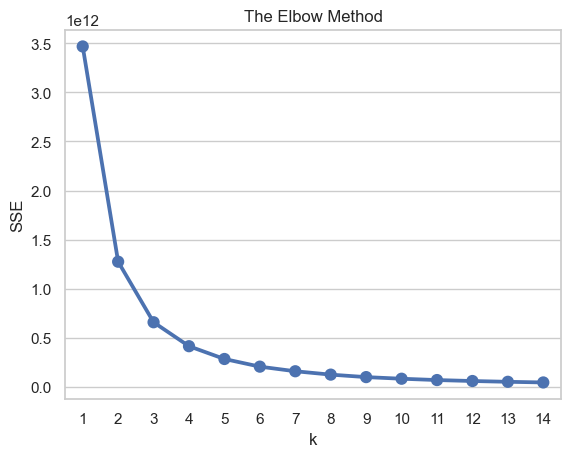

In [123]:
# Try different values of k (number of clusters)
sse = {}
for k in range(1, 15):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=654) 
    
    # Fit KMeans on the normalized dataset 
    kmeans.fit(regional_fam_num) 
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()));
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

### Model Building

In [124]:
# kmeans model with 3 clusters
kmeans = KMeans(n_clusters = 4, random_state=654)
kmeans.fit(regional_fam_num)

/Users/priamvyas/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=654)

### Summary Statistics for Clusters

In [125]:
cluster_labels = kmeans.labels_
regional_fam_k4 = regional_fam_num.assign(Cluster = cluster_labels)
regional_fam_k4.groupby(['Cluster']).agg({
    'dist_park' : 'mean',
    'email_sub': 'mean',
    'est_inc' : 'mean',
    'previous_attend':'mean',
    'social_media_scale':'mean',
    'youngest':['mean', 'count'],
}).round(2)

dist_park email_sub    est_inc previous_attend social_media_scale  \
             mean      mean       mean            mean               mean   
Cluster                                                                     
0           20.33      0.41   86046.08            1.96               0.50   
1           19.96      0.41   67999.99            2.06               0.51   
2           19.97      0.40   46651.31            2.03               0.51   
3           20.78      0.41  107507.80            1.98               0.51   

        youngest        
            mean count  
Cluster                 
0          32.29  2981  
1          32.39  2709  
2          32.96  1312  
3          32.52  1498

- 3 clusters seem to cause large variations in the count

# Conjoint Analysis & Memo Section

In [126]:
bbq = pd.read_csv("bbq_lake.csv")
del bbq['bundleID']
column_names = ['Starter', "MainDish", "SaladSoup", "Side", "Desssert", "Ratings"]
bbq.columns = column_names

In [127]:
bbq_dummies = pd.get_dummies(bbq, drop_first = True) 
bbq_dummies.head()

,Ratings,Starter_Fried Chicken Tenders,Starter_Jumbo Shrimp Cocktail,Starter_Sticky Chicken Tenders,MainDish_Grilled Portobello Mushrooms,MainDish_Grilled Salmon,MainDish_Grilled Sausages,MainDish_Smoked Turkey Legs,SaladSoup_Chili,SaladSoup_Potato Salad,SaladSoup_Winter Salad,Side_Mac and Cheese,Side_Mashed Potato,Desssert_Smores
0,7.307,True,False,False,False,False,True,False,False,False,True,True,False,True
1,5.397,True,False,False,False,False,True,False,False,False,True,True,False,False
2,6.357,True,False,False,False,False,True,False,False,False,True,False,True,True
3,7.307,True,False,False,False,False,True,False,False,False,True,False,False,True
4,8.167,True,False,False,False,False,True,False,False,True,False,True,False,True


In [128]:
X = bbq_dummies[list(bbq_dummies)[1:]]
y = bbq_dummies['Ratings']

model = LinearRegression()
model.fit(X, y)
model_coeff_df = pd.DataFrame({"Food":list(bbq_dummies)[1:], "Coeff":model.coef_})

In [129]:
model_coeff_df['Category'] = model_coeff_df['Food'].str.split('_', expand=True)[0]
model_coeff_df = model_coeff_df.groupby("Category").apply(lambda x: x.sort_values('Coeff', ascending=False))
model_coeff_df

Food     Coeff   Category
Category                                                                
Desssert  12                        Desssert_Smores  1.124756   Desssert
MainDish  5               MainDish_Grilled Sausages  1.721047   MainDish
          6             MainDish_Smoked Turkey Legs -0.365250   MainDish
          4                 MainDish_Grilled Salmon -0.489291   MainDish
          3   MainDish_Grilled Portobello Mushrooms -1.663102   MainDish
SaladSoup 7                         SaladSoup_Chili  1.680605  SaladSoup
          8                  SaladSoup_Potato Salad -0.074659  SaladSoup
          9                  SaladSoup_Winter Salad -0.942001  SaladSoup
Side      10                    Side_Mac and Cheese  0.091262       Side
          11                     Side_Mashed Potato -0.868634       Side
Starter   2          Starter_Sticky Chicken Tenders  2.138604    Starter
          0           Starter_Fried Chicken Tenders  0.138903    Starter
          1           Starter_Jumbo Shrimp Cocktail -0.076465    Starter

In [233]:
vsc = pd.read_csv("vendor-costs.csv")
selected_items = ["Sticky Chicken Tenders", "Grilled Sausages","Smoked Turkey Legs", "Chili","Mac and Cheese", "Smores"]
vsc_menu = vsc[vsc.Item.isin(selected_items)].reset_index(drop = True)
vsc_menu

,Item,Item Category,Cost Per Serving (Dollars)
0,Sticky Chicken Tenders,Starters,3.40
1,Grilled Sausages,Main Dish I,5.60
2,Smoked Turkey Legs,Main Dish I,4.35
3,Chili,Salad/Soup,6.00
4,Mac and Cheese,Side,0.74
5,Smores,Dessert,1.25


## Suggestions to Lobster Land

After conducting a comprehensive linear regression analysis of customer ratings, the following food items are recommended for the Barbeque Tent at Winter Wonderland:

**Starter: Sticky Chicken Tenders ($3.40)**

The Starter selection is guided by the highest positive coefficient (2.138), indicating strong customer preference for Sticky Chicken Tenders.

**Main Dishes: Grilled Sausages & Smoked Turkey Legs ($5.60 & $4.35)**

Grilled Sausages have the highest positive coefficient (1.721) among Main Dishes, suggesting a strong likability factor. Although Smoked Turkey Legs have a negative coefficient (-0.356), it picking the best amongst the worse then compared to the other items available

**Salad Soup: Chili ($6.00)**

Chili is the second-highest in customer preference that had the only positive coefficient (1.680) meaning that it was the most preferred salad soup based on taste and preference. If the beef is substituted for bean, it can be offered to a larger group of people.

**Side: Mac & Cheese ($0.74)**

While Mac and Cheese has the only positive coefficient, in the Side category therefore it is the obvious choice to be served the the visitors at lobsterland.Paired with the Chili this combination offers a balance of meat and vegetarian options, catering to a broader audience.

**Dessert: S’mores ($1.25)**

S’mores top the Dessert category with a coefficient of 1.124, signaling a high preference among customers. This traditional dessert is likely to be a crowd-pleaser.

**Pricing Strategy:**

A flat fee of $15 for access to the Barbeque Tent is recommended to simplify the purchasing process and provide customers with clear value. The selected dishes are anticipated to be well-received based on the data-driven analysis of taste preferences, which were evaluated independently of cost considerations.

**Conclusion:**

The combination of Sticky Chicken Tenders, Grilled Sausages, Smoked Turkey Legs, Chili, Mac & Cheese, and S'mores balances customer taste preferences with cost considerations effectively. This menu aligns with customer preferences and stays within the $17 price point for a 4 course meal.

It is important to note that the overall cost of the selections should not exceed a price point when considering the quantities of each that a typical customer would consume. Further analysis may be required to ensure that the selected menu items, when offered in reasonable portion sizes, will not surpass the revenue generated by the flat entry fee.


# Forecasting Total Revenue

# Classification

In [131]:
carnival_visitors = pd.read_csv("carnival-visitors.csv")

In [132]:
carnival_visitors.head()

,visitorID,age,gender,prev_wincarn,homestate,phys_level,travel_dist,occupation,companion_type,ski_snowboard,social_media,preference
0,1391,23,Male,2,Quebec,Sedentary,13.752619,student,fam_children,1,0.47,Indoor
1,1463,31,Male,0,Quebec,Sedentary,6.783148,blue collar,fam_children,1,0.73,Outdoor
2,1859,39,Male,1,Quebec,Sedentary,3.469193,white collar,fam_children,1,0.98,Outdoor
3,1523,24,Male,3,Quebec,Sedentary,16.867182,student,solo,1,0.30,Outdoor
4,100,45,Male,2,Quebec,Sedentary,13.083858,white collar,friends,1,0.34,Outdoor


In [133]:
for i in list(carnival_visitors):
    print(i, carnival_visitors[i].nunique())

visitorID 2400
age 68
gender 2
prev_wincarn 10
homestate 10
phys_level 3
travel_dist 2400
occupation 5
companion_type 3
ski_snowboard 2
social_media 101
preference 2


In [134]:
del carnival_visitors['visitorID']
del carnival_visitors['travel_dist']

#Delete column with all unique observations

In [135]:
carnival_visitors.preference.value_counts()
carnival_visitors.preference.value_counts(normalize = True)

preference
Outdoor    0.59375
Indoor     0.40625
Name: proportion, dtype: float64

In [136]:
missing_values = carnival_visitors.isna().sum() 
print(missing_values)

age                 0
gender              0
prev_wincarn        0
homestate           0
phys_level        146
occupation         50
companion_type      0
ski_snowboard       0
social_media        0
preference          0
dtype: int64


In [137]:
carnival_visitors.phys_level.value_counts(normalize = True)

phys_level
Moderate       0.444543
Sedentary      0.342059
Very Active    0.213398
Name: proportion, dtype: float64

In [138]:
carnival_visitors.occupation.value_counts(normalize = True)

occupation
white collar    0.427234
blue collar     0.254468
student         0.143830
retired         0.122979
gig worker      0.051489
Name: proportion, dtype: float64

In [139]:
#Replace missing values with Most Freqeunt Value
carnival_visitors.phys_level = carnival_visitors.phys_level.fillna(carnival_visitors.phys_level.mode().iloc[0])
carnival_visitors.occupation = carnival_visitors.occupation.fillna(carnival_visitors.occupation.mode().iloc[0])

In [140]:
carnival_visitors['preference_indoor'] = np.where(carnival_visitors['preference'] == "Indoor", 1, 0)
del carnival_visitors['preference']

In [141]:
carnival_visitors_dummies = pd.get_dummies(carnival_visitors)
carnival_visitors_dummies

,age,prev_wincarn,ski_snowboard,social_media,preference_indoor,gender_Female,gender_Male,homestate_Connecticut,homestate_Maine,homestate_Massachusetts,...,phys_level_Sedentary,phys_level_Very Active,occupation_blue collar,occupation_gig worker,occupation_retired,occupation_student,occupation_white collar,companion_type_fam_children,companion_type_friends,companion_type_solo
0,23,2,1,0.47,1,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
1,31,0,1,0.73,0,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,39,1,1,0.98,0,False,True,False,False,False,...,True,False,False,False,False,False,True,True,False,False
3,24,3,1,0.30,0,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,45,2,1,0.34,0,False,True,False,False,False,...,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,46,1,0,0.49,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2396,72,0,0,0.75,1,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2397,26,3,0,0.06,1,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2398,38,2,0,0.16,1,True,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False


In [142]:
X = carnival_visitors_dummies.drop('preference_indoor', axis = 1) 
y = carnival_visitors_dummies['preference_indoor']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 348)

In [144]:
rf = RandomForestClassifier(random_state = 812) 
param_grid = {
'n_estimators': [10, 15, 20], 
'max_depth': [8, 10, 15],
'min_samples_split': [2, 5, 8], 
'min_samples_leaf': [2, 4, 8]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1) 
grid_search.fit(X_train, y_train)
print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 15}


In [145]:
rf_best = RandomForestClassifier(**grid_search.best_params_) 
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, n_estimators=15)

In [146]:
feature_importance = rf_best.feature_importances_
sorted_idx = feature_importance.argsort()

df_importance = pd.DataFrame({'Variable': list(X_train), "Score": feature_importance}) 
df_importance.sort_values("Score", ascending = False).reset_index(drop = True)

,Variable,Score
0,phys_level_Sedentary,0.188984
1,age,0.133701
2,phys_level_Moderate,0.112272
3,social_media,0.111241
4,prev_wincarn,0.056357
5,phys_level_Very Active,0.054842
6,homestate_Quebec,0.039938
7,gender_Female,0.032354
8,companion_type_solo,0.029003
9,gender_Male,0.024642


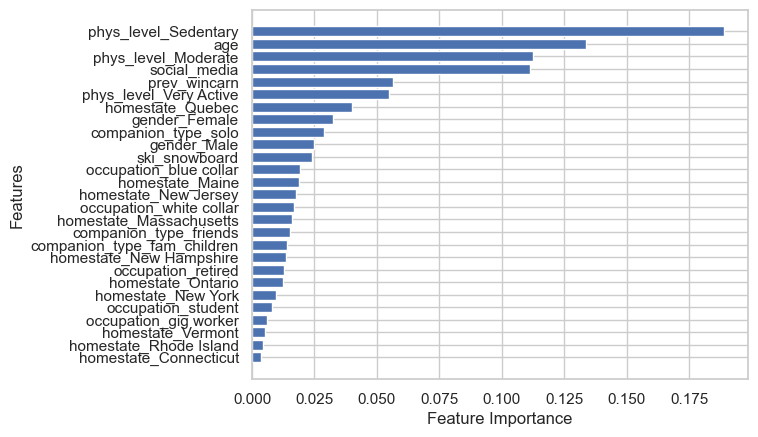

In [147]:
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.yticks(range(X.shape[1]), rf_best.feature_names_in_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

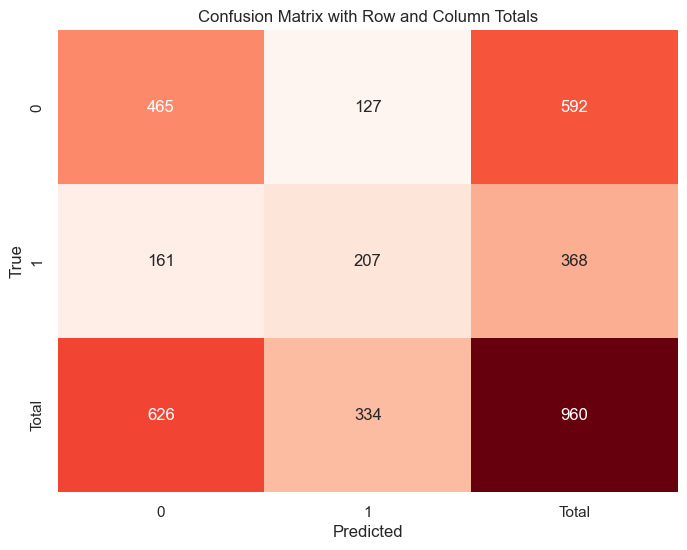

a. Accuracy: 70.0
b. Sensitivity: 56.25
c. Specificity: 78.547
d. Precision: 61.976
e. Balanced Accuracy: 67.399


In [148]:
y_pred = rf_best.predict(X_test) 
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Compute row and column sums 
row_sums = np.sum(cm, axis=1) 
col_sums = np.sum(cm, axis=0)
# Add row and column sums to the confusion matrix 
cm_with_totals = np.vstack((cm, col_sums))
cm_with_totals = np.column_stack((cm_with_totals, np.append(row_sums, np. sum(col_sums))))

# Plot the confusion matrix with totals 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_with_totals, annot=True, fmt="d", cmap="Reds", cbar=False, xticklabels=["0", "1", "Total"], yticklabels=["0", "1", "Total"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Row and Column Totals')
plt.show()

# a. Accuracy
accuracy = accuracy_score(y_test, y_pred) 
print("a. Accuracy:", round(accuracy * 100,3))
# b. Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)
print("b. Sensitivity:", round(sensitivity * 100,3)) 
# c. Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
specificity = tn / (tn + fp)
print("c. Specificity:", round(specificity * 100,3)) 
# d. Precision
precision = precision_score(y_test, y_pred) 
print("d. Precision:", round(precision * 100,3))
# e. Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred) 
print("e. Balanced Accuracy:", round(balanced_accuracy * 100,3))

# Strategic Memo

# A/B Testing

In [149]:
ice_sculp = pd.read_csv("ice_sculptures.csv")

In [150]:
ice_sculp.drop('recipient', axis=1,inplace=True)

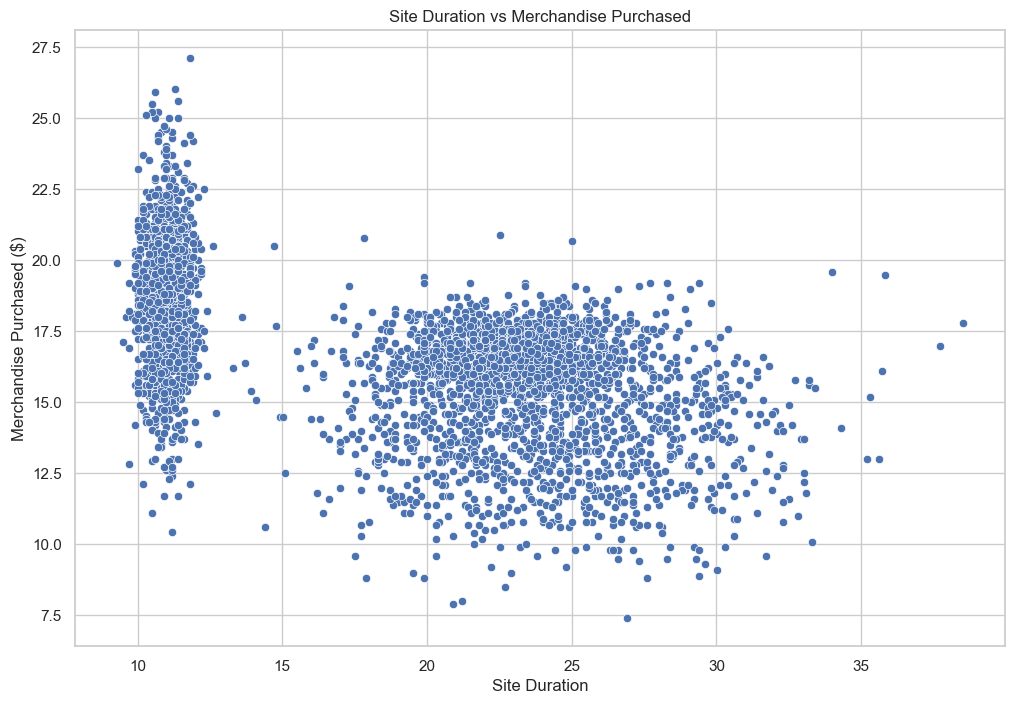

In [151]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='site_duration', y='spend', data=ice_sculp)
plt.xlabel('Site Duration')
plt.ylabel('Merchandise Purchased ($)')
plt.title('Site Duration vs Merchandise Purchased')

plt.show()

/Users/priamvyas/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


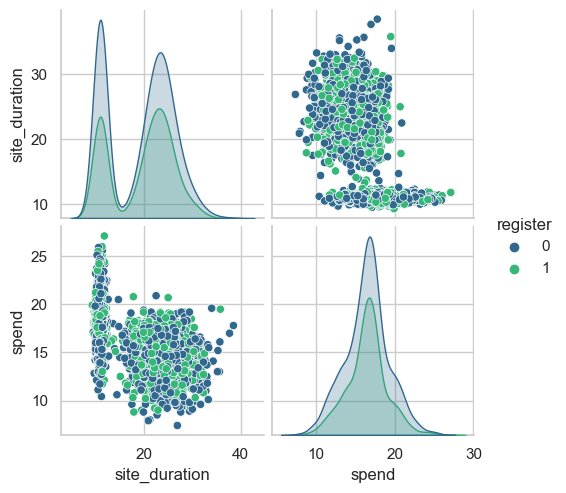

In [152]:
sns.set(style="whitegrid")

# Create a correlation matrix
corr_matrix = ice_sculp[["site_duration", "spend"]].corr()

# Plot a correlation scatterplot matrix
sns.pairplot(ice_sculp, kind='scatter', hue='register', palette='viridis')

# Show the plot
plt.show()

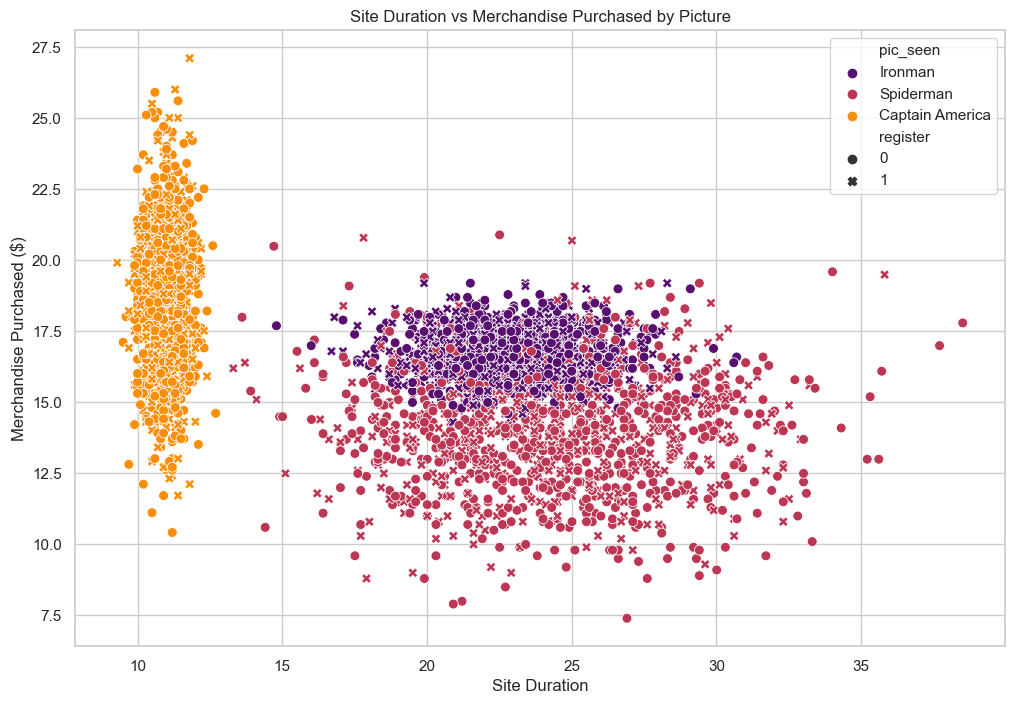

In [153]:
# Plot the scatter plot with different colors for each pic_seen category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='site_duration', y='spend', hue='pic_seen', style='register', data=ice_sculp, palette='inferno', s=50)

# Add labels and title
plt.xlabel('Site Duration')
plt.ylabel('Merchandise Purchased ($)')
plt.title('Site Duration vs Merchandise Purchased by Picture')

# Show the legend
plt.legend()

# Show the plot
plt.show()

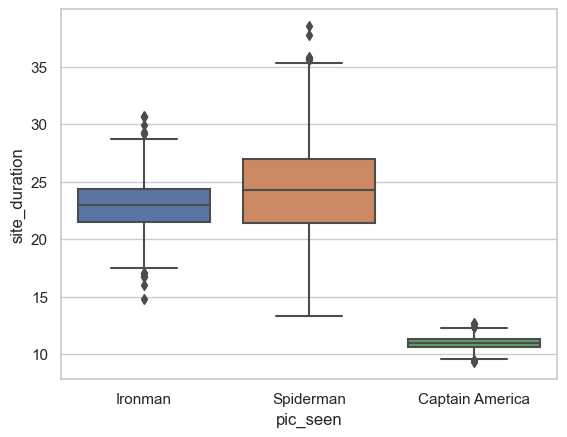

In [154]:
sns.boxplot(x='pic_seen', y='site_duration', data=ice_sculp)
plt.show()

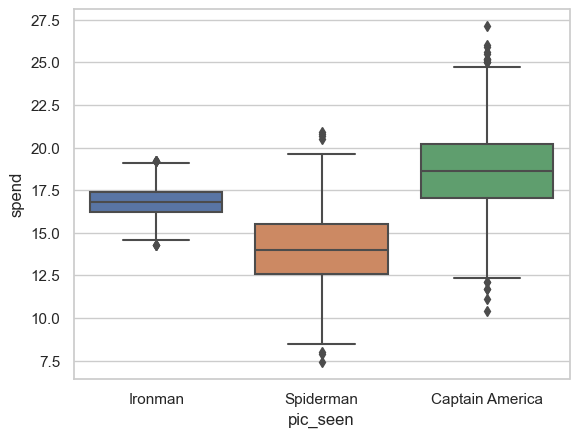

In [155]:
sns.boxplot(x='pic_seen', y='spend', data=ice_sculp)
plt.show()

In [156]:
ice_sculp.groupby('pic_seen')['register'].value_counts(normalize = True)

pic_seen         register
Captain America  0           0.651489
                 1           0.348511
Ironman          0           0.559459
                 1           0.440541
Spiderman        0           0.658537
                 1           0.341463
Name: proportion, dtype: float64

In [157]:
Sculpture_Proportion = ice_sculp.register.sum()/ice_sculp.shape[0]

Expected_I = round(ice_sculp[ice_sculp.pic_seen == "Ironman"].shape[0] * Sculpture_Proportion, 4)
Expected_S = round(ice_sculp[ice_sculp.pic_seen == "Spiderman"].shape[0] * Sculpture_Proportion, 4)
Expected_C = round(ice_sculp[ice_sculp.pic_seen == "Captain America"].shape[0] * Sculpture_Proportion, 4)

print(Expected_I)
print(Expected_S)
print(Expected_C)

417.5559
431.8506
429.5935


In [158]:
ice_sculp[ice_sculp.register == 1].pic_seen.value_counts()

pic_seen
Ironman            489
Captain America    398
Spiderman          392
Name: count, dtype: int64

In [159]:
# Define the observed frequencies of returns for each day_code group 
observed_frequencies = [489, 398, 392]  # Replace with actual numbers
# Define the expected frequencies assuming no difference (equal distribution) 
expected_frequencies = [Expected_I, Expected_C, Expected_S]
# Perform the chi-square goodness of fit test
chi_square_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
# Print the results
print("Chi-square statistic:", round(chi_square_statistic, 3)) 
print("p-value:", p_value)

Chi-square statistic: 18.225
p-value: 0.00011028040381769651


In [228]:
ice_sculp.groupby("pic_seen")['register'].value_counts(normalize = True)

pic_seen         register
Captain America  0           0.651489
                 1           0.348511
Ironman          0           0.559459
                 1           0.440541
Spiderman        0           0.658537
                 1           0.341463
Name: proportion, dtype: float64

In [234]:
# DANYA'S ATTEMPT
# running the t-test on site_duration
# Perform t-tests for each pair of 'pic_seen'
pic_seen_categories = ice_sculp['pic_seen'].unique()

for i in range(len(pic_seen_categories)):
    for j in range(i + 1, len(pic_seen_categories)):
        category1 = pic_seen_categories[i]
        category2 = pic_seen_categories[j]
        
        # Subset the data for each category
        data_category1 = ice_sculp[ice_sculp['pic_seen'] == category1]['site_duration']
        data_category2 = ice_sculp[ice_sculp['pic_seen'] == category2]['site_duration']
        
        # Perform t-test
        t_stat, p_value = ttest_ind(data_category1, data_category2, equal_var = False)
        
        # Display results
        print(f"T-test between {category1} and {category2}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")

        # Interpret the results based on the p-value
        if p_value < 0.05:
            print("There is a significant difference in site duration between the two categories.")
        else:
            print("There is no significant difference in site duration between the two categories.")
        print("\n" + "="*50 + "\n")

T-test between Ironman and Spiderman:
T-statistic: -10.001841948108055
P-value: 5.917256397701659e-23

There is a significant difference in site duration between the two categories.


T-test between Ironman and Captain America:
T-statistic: 178.43526393191596
P-value: 0.0

There is a significant difference in site duration between the two categories.


T-test between Spiderman and Captain America:
T-statistic: 112.41074656435279
P-value: 0.0

There is a significant difference in site duration between the two categories.




In [237]:
print(f"Total time spent on site, Ironman: {ice_sculp.loc[ice_sculp['pic_seen'] == 'Ironman', 'site_duration'].mean():.2f}")
print(f"Total time spent on site, Captain America: {ice_sculp.loc[ice_sculp['pic_seen'] == 'Captain America', 'site_duration'].mean():.2f}")
print(f"Total time spent on site, Spiderman: {ice_sculp.loc[ice_sculp['pic_seen'] == 'Spiderman', 'site_duration'].mean():.2f}")

Total time spent on site, Ironman: 22.95
Total time spent on site, Captain America: 10.98
Total time spent on site, Spiderman: 24.29


In [235]:
# DANYA'S ATTEMPT
# PIC_SEEN AND SPEND
for i in range(len(pic_seen_categories)):
    for j in range(i + 1, len(pic_seen_categories)):
        category1 = pic_seen_categories[i]
        category2 = pic_seen_categories[j]
        
        # Subset the data for each category
        data_category1 = ice_sculp[ice_sculp['pic_seen'] == category1]['spend']
        data_category2 = ice_sculp[ice_sculp['pic_seen'] == category2]['spend']
        
        # Perform t-test
        t_stat, p_value = ttest_ind(data_category1, data_category2, equal_var=False)
        
        # Display results
        print(f"T-test between {category1} and {category2} on spend:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        print("")

        # Interpret the results based on the p-value
        if p_value < 0.05:
            print("There is a significant difference in spend between the two categories.")
        else:
            print("There is no significant difference in spend between the two categories.")
        print("\n" + "="*50 + "\n")

T-test between Ironman and Spiderman on spend:
T-statistic: 41.02687256136666
P-value: 1.7008147207546044e-248

There is a significant difference in spend between the two categories.


T-test between Ironman and Captain America on spend:
T-statistic: -23.859305670179324
P-value: 3.887318300569778e-106

There is a significant difference in spend between the two categories.


T-test between Spiderman and Captain America on spend:
T-statistic: -48.18418360763735
P-value: 0.0

There is a significant difference in spend between the two categories.




In [236]:
print(f"Total merchandise spending, Ironman: {ice_sculp.loc[ice_sculp['pic_seen'] == 'Ironman', 'spend'].mean():.2f}$")
print(f"Total merchandise spending, Captain America: {ice_sculp.loc[ice_sculp['pic_seen'] == 'Captain America', 'spend'].mean():.2f}$")
print(f"Total merchandise spending, Spiderman: {ice_sculp.loc[ice_sculp['pic_seen'] == 'Spiderman', 'spend'].mean():.2f}$")

Total merchandise spending, Ironman: 16.78$
Total merchandise spending, Captain America: 18.61$
Total merchandise spending, Spiderman: 14.02$


### Picture to be used for registration

*Chi-Squared Test*
Test whether the picture shown in the mail has any effect on the distribution of people that registered for Lobster Lobster Lands 2023 Winter Wonderland.

*H0:* There is no difference in the pic seen and distribution of people that registered for the 2023 Winter Wonderland.

*H1:* There is a difference in the pic seen and distribution of people that registered for the 2023 Winter Wonderland.

&nbsp;&nbsp;&nbsp;&nbsp;Chi-square statistic: 18.225

&nbsp;&nbsp;&nbsp;&nbsp;p-value: 0.0001

**Conclusion:**

Since p-value is lower than the set threshold of 0.005, we reject the null and conclude that the pic seen in the mail has an effect on the distribution of people that registered for the 2023 Winter Wonderland. Ironman has the highest percentage of users registered for the 2023 Winter Wonderland, if the goal of Lobster Land is to get as many as they can to sign up, they should include the Ironman ice sculpture image in their promotional mails. 

### Picture to be used for website expenditure

**T-test**

Test to see if there is significant difference between the means of the groups.

*Groups here are the people who got either Spiderman, Ironman or Captain America in the promotional email*

*H0:* The difference in the mean amount spent (in dollars) on the Lobsterland website between and 2 groups is 0

*H1:* The difference in the mean amount spent  (in dollars) on the Lobsterland website between 2 groups not 0.

**T-test between Ironman and Spiderman:**

&nbsp;&nbsp;&nbsp;&nbsp;T-statistic: 41.03

&nbsp;&nbsp;&nbsp;&nbsp;P-value: 1.7008147207546044e-248

**T-test between Ironman and Captain America:**

&nbsp;&nbsp;&nbsp;&nbsp;T-statistic: -23.86

&nbsp;&nbsp;&nbsp;&nbsp;P-value: 3.887318300569778e-106

**T-test between Spiderman and Captain America:**

&nbsp;&nbsp;&nbsp;&nbsp;T-statistic: -48.18

&nbsp;&nbsp;&nbsp;&nbsp;P-value: 0.0

Since the p-values for all 3 tests are 0, that means there is statistically significant difference between the mean spends between the 3 groups.

**Mean Spend on website for each group:**

&nbsp;&nbsp;&nbsp;&nbsp;Total merchandise spending, Ironman: 16.78$

&nbsp;&nbsp;&nbsp;&nbsp;Total merchandise spending, Captain America: 18.61$

&nbsp;&nbsp;&nbsp;&nbsp;Total merchandise spending, Spiderman: 14.02$

In lieu of the 3 tests that were performed and mean merchandise spend given, if Lobserland wants to boost online revenue, they should use the Captain America ice sculpture image in their promotional emails.



### Picture to be used for website exposure

Test to see if there is significant difference between the means of the groups.
*Groups here are the people who got either Spiderman, Ironman or Captain America in the promotional email*


*H0:* The difference in the mean amount of time spent on the Lobsterland website between and 2 groups is 0.

*H1:* The difference in the mean amount of time spent on the Lobsterland website between and 2 groups not 0.


*T-test between Ironman and Spiderman:*

&nbsp;&nbsp;&nbsp;&nbsp;T-statistic: -10.00

&nbsp;&nbsp;&nbsp;&nbsp;P-value: 5.917256397701659e-23

*T-test between Ironman and Captain America:*

&nbsp;&nbsp;&nbsp;&nbsp;T-statistic: 178.43

&nbsp;&nbsp;&nbsp;&nbsp;P-value: 0.0

*T-test between Spiderman and Captain America:*

&nbsp;&nbsp;&nbsp;&nbsp;T-statistic: 112.41

&nbsp;&nbsp;&nbsp;&nbsp;P-value: 0.0

Since the p-values for all 3 tests are 0, that means there is statistically significant difference between the mean amount of time spent between the 3 groups.

**Mean Spend on website for each group:**

&nbsp;&nbsp;&nbsp;&nbsp;Total time spent on site, Ironman: 22.95

&nbsp;&nbsp;&nbsp;&nbsp;Total time spent on site, Captain America: 10.98

&nbsp;&nbsp;&nbsp;&nbsp;Total time spent on site, Spiderman: 24.29

In lieu of the 3 tests that were performed and mean time spent  given, if Lobserland wants users to remain on the website, they should use the Spiderman ice sculpture image in their promotional emails.


**In conclusion, all 3 images will provide some kind of benefit to Lobster Land, either in terms of engagement or direct revenue.**

# Conclusions